   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None


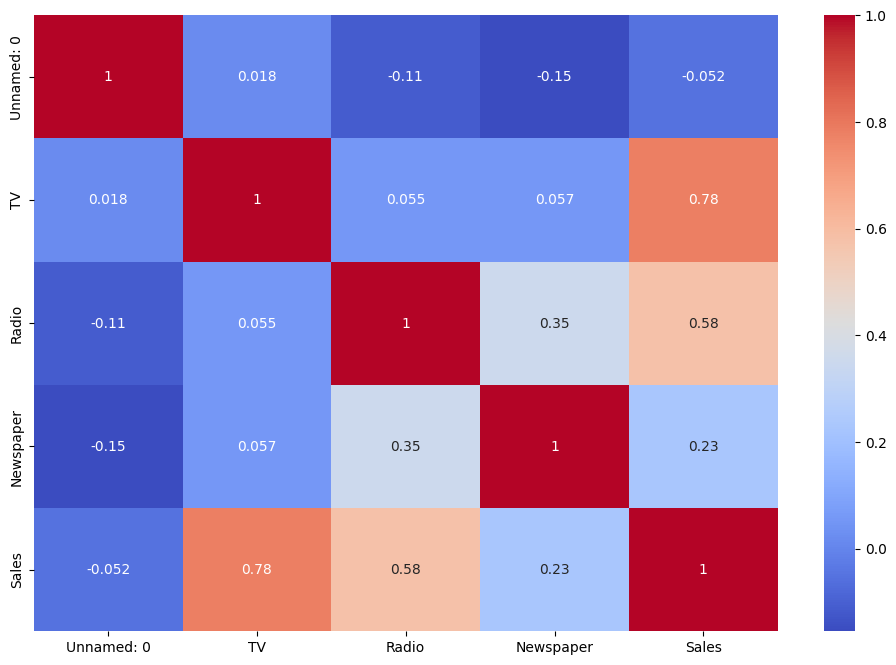

Linear Regression Evaluation:
MAE: 1.465060105010293
RMSE: 1.7885761008659673
R²: 0.898648915141708
Random Forest Evaluation:
MAE: 1.465060105010293
RMSE: 1.7885761008659673
R²: 0.898648915141708


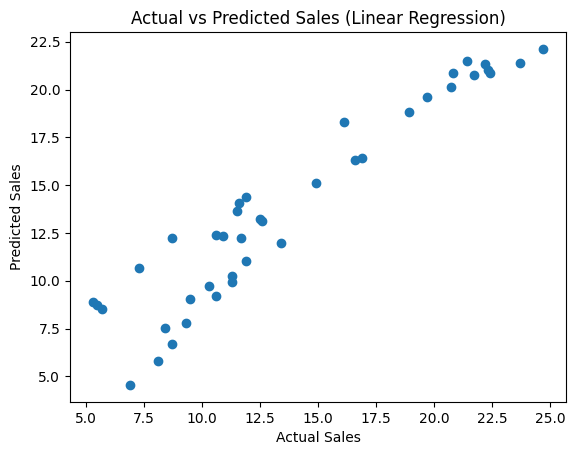

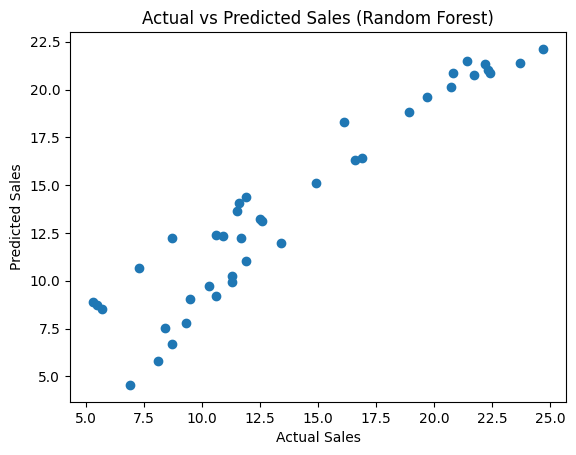

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
# Load dataset
df = pd.read_csv('sale data.csv')

# Explore dataset
print(df.head())
print(df.info())  # Check for missing values and data types
# Drop rows with missing values
df = df.dropna()

# Convert categorical features (e.g., platform, region, etc.) into numerical values
df = pd.get_dummies(df, drop_first=True)

# Check correlation between features
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()
# Define features (X) and target (y)
X = df.drop('Sales', axis=1)  # Assuming 'Sales' is the column to predict
y = df['Sales']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize Linear Regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_linear = linear_model.predict(X_test)
# Function to evaluate the model
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = linear_model.score(X_test, y_test)  # or rf_model.score(X_test, y_test)
    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}')
    print(f'R²: {r2}')

# Evaluate Linear Regression
print("Linear Regression Evaluation:")
evaluate_model(y_test, y_pred_linear)

# Evaluate Random Forest (if used)
print("Random Forest Evaluation:")
evaluate_model(y_test, y_pred_linear)
# Scatter plot for Linear Regression
plt.scatter(y_test, y_pred_linear)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales (Linear Regression)')
plt.show()

# Scatter plot for Random Forest (optional)
plt.scatter(y_test, y_pred_linear)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales (Random Forest)')
plt.show()